<a href="https://colab.research.google.com/github/cosmin220304/Brollo/blob/master/Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

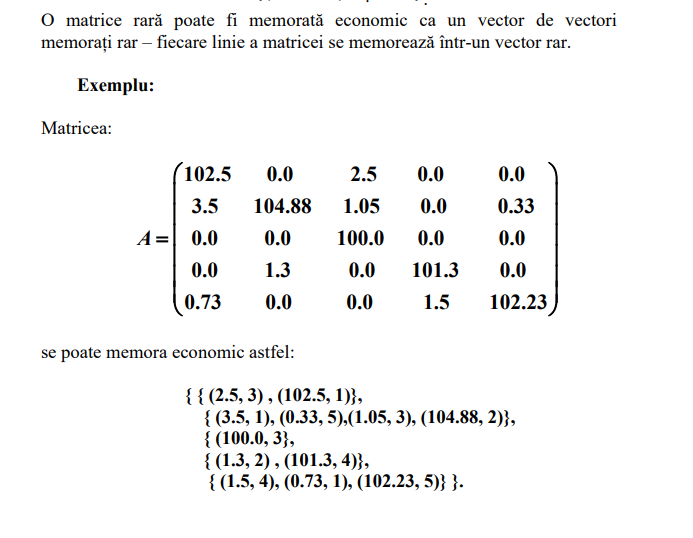

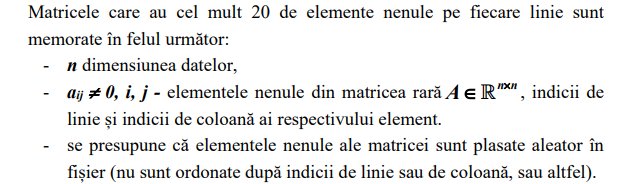


In [2]:
import csv

def AddToVectos(vectors, val, i, j):
  vector = vectors[i]
  for pos in range(len(vector)):
    if vector[pos][1] == j:
      vector[pos] = (vector[pos][0] + val, j)
      return
  vectors[i].append((val, j))

def ReadRareMatrix(*input_file):
  vectors = []
  n = 0
  file = ''
  
  if len(input_file) > 0:
    file = input_file[0]
  else:
    file = input('enter file name or press x for example matrix ')
    if file == 'x':
      file = 'example_matrix.txt'

  with open(file) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    hasReadSize = False

    for row in csv_reader:
        if len(row) == 0: 
          continue
        if not hasReadSize:
          n = int(row[0]) 
          vectors = [[] for _ in range(n)] 
          hasReadSize = True
        else:
          val = float(row[0])
          i = int(row[1])
          j = int(row[2])
          AddToVectos(vectors, val, i, j)
    return (vectors, n)

vectors, n = ReadRareMatrix()
print(vectors, n)
  

enter file name or press x for example matrix x
[[(102.5, 0), (2.5, 2)], [(3.5, 0), (104.88, 1), (1.05, 2), (0.33, 4)], [(100.0, 2)], [(1.3, 1), (101.3, 3)], [(0.73, 0), (1.5, 3), (102.23, 4)]] 5


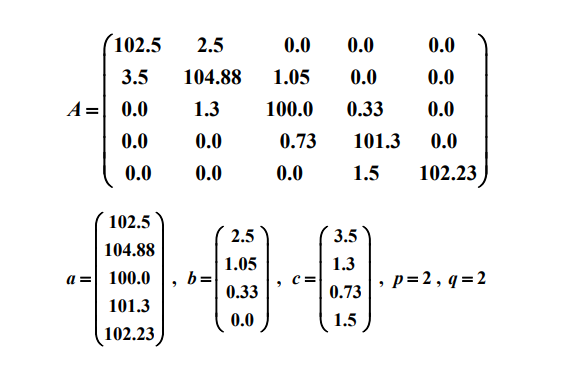

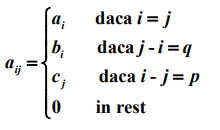

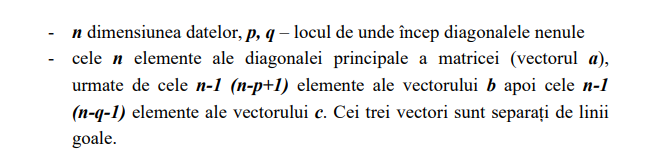

In [3]:
def ReadTridiagonalMatrix(*input_file):
  a = []
  b = []
  c = []
  n = 0
  p = 0
  q = 0
  file = ''

  if len(input_file) > 0:
    file = input_file[0]
  else:
    file = input('enter file name or press x for example matrix ')
    if file == 'x':
      file = 'example_matrix2.txt'

  with open(file) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line = 0
    _n = 0

    for row in csv_reader:
        if len(row) == 0: 
          continue
        if line == 0:
          n = int(row[0]) 
          vectors = [[] for _ in range(n)] 
        elif line == 1:
          p = int(row[0])
        elif line == 2:
          q = int(row[0])
        else:
          val = float(row[0])
          _n += 1
          if _n <= n:
            a += [val]
            continue
          elif _n <= n + n - p:
            b += [val]
          else:
            c += [val]
        line += 1
  return (a, b, c, n, p, q)

a, b, c, n, p, q = ReadTridiagonalMatrix()
print(a)
print(b)
print(c)

enter file name or press x for example matrix x
[102.5, 104.88, 100.0, 101.3, 102.23]
[2.5, 1.05, 0.33, 0.0]
[3.5, 1.3, 0.73, 1.5]


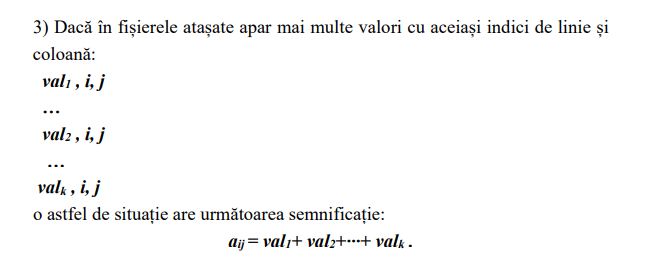

In [4]:
def badExampleTest():
  vectors, n = ReadRareMatrix('bad example.txt')
  print(vectors)

badExampleTest()

[[(204.0, 0), (101.0, 1)], [(1.0, 1)], [], [], []]


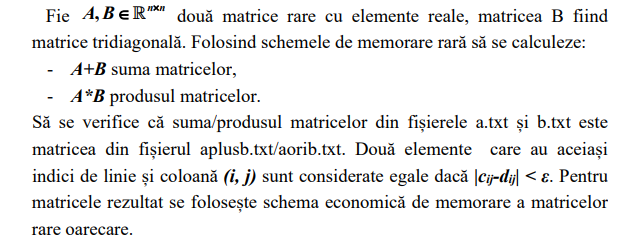

In [15]:
import copy 

def sortList(list):
  for i in range(len(list)):
    for j in range(i + 1, len(list)):
      if list[i][1] > list[j][1]:
        list[i], list[j] = list[j], list[i]

def compareRareMatrices(a, real_a):
  
  if len(a) != len(real_a):
    return False
    
  isEqual = False
  for i in range(len(real_a)):
    sortList(a[i])
    sortList(real_a[i])
    for j in range(len(real_a[i])):
      if a[i][j] != real_a[i][j]:
        print(a[i])
        print(real_a[i])
        return False  
  return True
  
ma, na = ReadRareMatrix('a.txt')
a, b, c, n, p, q = ReadTridiagonalMatrix('b.txt')

print(ma, na)
print(a, b, c, n, p, q)


[[(132.5, 0), (7.0, 1110), (17.0, 15), (8.0, 245)], [(24.5, 626), (21.0, 878), (150.5, 1), (1.0, 187), (3.5, 937)], [(135.5, 2), (24.0, 96), (11.0, 809)], [(1.0, 1322), (123.0, 3), (19.0, 1247), (2.5, 1737)], [(150.5, 4), (24.5, 1206), (1.5, 1233), (24.0, 1683)], [(11.0, 1238), (148.0, 5), (22.5, 85), (14.0, 1889)], [(109.5, 6), (9.0, 805)], [(6.0, 1002), (15.0, 1426), (131.0, 7), (2.5, 1623), (7.0, 1905)], [(152.0, 8), (8.5, 252), (22.0, 1760), (19.0, 471), (2.0, 1389)], [(3.5, 276), (113.0, 9), (9.0, 413)], [(125.5, 10), (25.0, 1788)], [(14.5, 80), (22.0, 862), (158.5, 11), (21.5, 1555)], [(134.0, 12), (11.0, 576), (22.5, 757)], [(4.0, 738), (139.0, 13), (17.5, 221), (17.0, 1159)], [(110.5, 14), (10.0, 1734)], [(9.0, 134), (1.5, 1174), (118.0, 15), (7.0, 583)], [(137.0, 16), (12.0, 262), (23.5, 815), (1.0, 1815)], [(11.0, 198), (4.5, 934), (116.0, 17)], [(125.5, 18), (25.0, 231)], [(2.5, 872), (103.0, 19)], [(147.0, 20), (14.0, 1338), (10.0, 205), (10.5, 449), (12.0, 755)], [(10.5, 1

In [6]:
def Sum(*input_file):
  global ma, na, a, b, c, n, p, q
  sum = copy.deepcopy(ma)
  if na != n:
    raise Exception("Impossible Sum!")

  for i in range(n):
    AddToVectos(sum, a[i], i, i)
    if i < len(b):
      AddToVectos(sum, b[i], i, i + q)
    if i < len(c):
      AddToVectos(sum, c[i], i + p, i)
  
  print(sum)

  want_to_compare = input('want to compare result? (y/n) ')
  if 'y' in want_to_compare:
    file = ''
    if len(input_file) > 0:
      file = input_file[0]
    else:
      file = input('enter file name ')
      
    real_sum, _ = ReadRareMatrix(file)
    print(real_sum)
    
    isEqual = compareRareMatrices(sum, real_sum) 
    print(f'The two matrices are equal: {isEqual}')

Sum('aplusb.txt')

[[(143.25, 0), (7.0, 1110), (17.0, 15), (8.0, 245), (3.0, 1)], [(24.5, 626), (21.0, 878), (161.0, 1), (1.0, 187), (3.5, 937), (1.75, 0), (4.75, 2)], [(138.25, 2), (24.0, 96), (11.0, 809), (10.25, 1), (9.75, 3)], [(1.0, 1322), (133.75, 3), (19.0, 1247), (2.5, 1737), (7.0, 2), (3.0, 4)], [(156.0, 4), (24.5, 1206), (1.5, 1233), (24.0, 1683), (8.25, 3), (9.25, 5)], [(11.0, 1238), (156.0, 5), (22.5, 85), (14.0, 1889), (12.75, 4), (11.5, 6)], [(115.0, 6), (9.0, 805), (1.75, 5), (4.0, 7)], [(6.0, 1002), (15.0, 1426), (136.0, 7), (2.5, 1623), (7.0, 1905), (5.0, 6), (1.25, 8)], [(158.5, 8), (8.5, 252), (22.0, 1760), (19.0, 471), (2.0, 1389), (4.5, 7), (10.75, 9)], [(3.5, 276), (124.5, 9), (9.0, 413), (13.0, 8), (4.0, 10)], [(126.75, 10), (25.0, 1788), (6.75, 9), (9.0, 11)], [(14.5, 80), (22.0, 862), (170.25, 11), (21.5, 1555), (7.0, 10), (4.0, 12)], [(142.75, 12), (11.0, 576), (22.5, 757), (9.25, 11), (5.25, 13)], [(4.0, 738), (149.0, 13), (17.5, 221), (17.0, 1159), (12.0, 12), (4.75, 14)], [(1

In [19]:
def Product(*input_file):
  global ma, na, a, b, c, n, p, q
  product = [[] for _ in range(n)] 
  if na != n:
    raise Exception("Impossible Product!")

  for i in range(n):
    for j in range(n):
      # for k in range(n):
        # product[i][j] += a[i][k] * b[k][j]

      for vector in ma[i]:
        k = vector[1] 
        if k == j:
          AddToVectos(product, a[k] * vector[0], i, j)
        if j == k + q:
          AddToVectos(product, b[k - q + 1] * vector[0], i, j)
        if k == j + p:
          AddToVectos(product, c[k - p] * vector[0], i, j)
  
  print(product)

  want_to_compare = input('want to compare result? (y/n) ')
  if 'y' in want_to_compare:
    file = ''
    if len(input_file) > 0:
      file = input_file[0]
    else:
      file = input('enter file name ')
      
    real_sum, _ = ReadRareMatrix(file)
    print(real_sum)
    
    isEqual = compareRareMatrices(product, real_sum) 
    print(f'The two matrices are equal: {isEqual}')


Product('aorib.txt')


[[(1424.375, 0), (397.5, 1), (157.25, 14), (89.25, 15), (119.0, 16), (68.0, 244), (84.0, 245), (48.0, 246), (8.75, 1109), (14.0, 1110), (89.25, 1111)], [(263.375, 0), (1580.25, 1), (714.875, 2), (7.0, 186), (5.5, 187), (6.75, 188), (300.125, 625), (122.5, 626), (110.25, 627), (36.75, 877), (120.75, 878), (68.25, 879), (33.25, 936), (41.125, 937), (3.5, 938)], [(1388.875, 1), (372.625, 2), (1321.125, 3), (36.0, 95), (198.0, 96), (318.0, 97), (16.5, 808), (132.0, 809), (137.5, 810)], [(861.0, 2), (1322.25, 3), (369.0, 4), (156.75, 1246), (147.25, 1247), (123.5, 1248), (6.0, 1321), (2.0, 1322), (8.0, 1323), (27.5, 1736), (31.25, 1737), (8.125, 1738)], [(1241.625, 3), (827.75, 4), (1392.125, 5), (42.875, 1205), (24.5, 1206), (171.5, 1207), (7.125, 1232), (4.875, 1233), (17.625, 1234), (60.0, 1682), (108.0, 1683), (42.0, 1684)], [(1887.0, 4), (1184.0, 5), (1702.0, 6), (247.5, 84), (135.0, 85), (230.625, 86), (129.25, 1237), (66.0, 1238), (93.5, 1239), (112.0, 1888), (119.0, 1889), (42.0, 18